Evan Edelstein
EN.605.645.82.SP26

# Module 4 - Programming Assignment

## General Directions

1. You must follow the Programming Requirements outlined on Canvas.
2. The Notebook should be cleanly and fully executed before submission.
3. You should change the name of this file to be your JHED id. For example, `jsmith299.ipynb` although Canvas will change it to something else...
4. You must follow the Programming Requirments for this course.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>
        You should always read the entire assignment before beginning your work, so that you know in advance what the requested output will be and can plan your implementation accordingly.
    </p>
</div>

<div style="color: white; background: #C83F49; margin:20px; padding: 20px;">
    <strong>Academic Integrity and Copyright</strong>
    <p>You are not permitted to consult outside sources (Stackoverflow, YouTube, ChatGPT, etc.) or use "code assistance" (Co-Pilot, etc) to complete this assignment. By submitting this assignment for grading, you certify that the submission is 100% your own work, based on course materials, group interactions, instructor guidance. You agree to comply by the requirements set forth in the Syllabus, including, by reference, the JHU KSAS/WSE Graduate Academic Misconduct Policy.</p>
    <p>Sharing this assignment either directly (e.g., email, github, homework site) or indirectly (e.g., ChatGPT, machine learning platform) is a violation of the copyright. Additionally, all such sharing is a violation the Graduate Academic Misconduct Policy (facilitating academic dishonesty is itself academic dishonesty), even after you graduate.</p>
    <p>If you have questions or if you're unsure about the policy, ask via Canvas Inbox. In this case, being forgiven is <strong>not</strong> easier than getting permission and ignorance is not an excuse.</p>
    <p>This assignment is copyright (&copy Johns Hopkins University &amp; Stephyn G. W. Butcher). All rights reserved.</p>
</div>

In [1]:
from pprint import pprint

## Local Search - Genetic Algorithm

There are some key ideas in the Genetic Algorithm.

First, there is a problem of some kind that either *is* an optimization problem or the solution can be expressed in terms of an optimization problem.
For example, if we wanted to minimize the function

$$f(x) = \sum (x_i - 0.5)^2$$

where $n = 10$.
This *is* an optimization problem. Normally, optimization problems are much, much harder.

![Eggholder](http://www.sfu.ca/~ssurjano/egg.png)!

The function we wish to optimize is often called the **objective function**.
The objective function is closely related to the **fitness** function in the GA.
If we have a **maximization** problem, then we can use the objective function directly as a fitness function.
If we have a **minimization** problem, then we need to convert the objective function into a suitable fitness function, since fitness functions must always mean "more is better".

Second, we need to *encode* candidate solutions using an "alphabet" analogous to G, A, T, C in DNA.
This encoding can be quite abstract.
You saw this in the Self Check.
There a floating point number was encoded as bits, just as in a computer and a sophisticated decoding scheme was then required.

Sometimes, the encoding need not be very complicated at all.
For example, in the real-valued GA, discussed in the Lectures, we could represent 2.73 as....2.73.
This is similarly true for a string matching problem.
We *could* encode "a" as "a", 97, or '01100001'.
And then "hello" would be:

```
["h", "e", "l", "l", "o"]
```

or

```
[104, 101, 108, 108, 111]
```

or

```
0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1
```

In Genetics terminology, this is the **chromosome** of the individual. And if this individual had the **phenotype** "h" for the first character then they would have the **genotype** for "h" (either as "h", 104, or 01101000).

To keep it straight, think **geno**type is **genes** and **pheno**type is **phenomenon**, the actual thing that the genes express.
So while we might encode a number as 10110110 (genotype), the number itself, 182, is what goes into the fitness function.
The environment operates on zebras, not the genes for stripes.

## String Matching

You are going to write a Genetic Algorithm that will solve the problem of matching a target string (at least at the start).
Now, this is kind of silly because in order for this to work, you need to know the target string and if you know the target string, why are you trying to do it?
Well, the problem is *pedagogical*.
It's a fun way of visualizing the GA at work, because as the GA finds better and better candidates, they make more and more sense.

Now, string matching is not *directly* an optimization problem so this falls under the general category of "if we convert the problem into an optimization problem we can solve it with an optimization algorithm" approach to problem solving.
This happens all the time.
We have a problem.
We can't solve it.
We convert it to a problem we *can* solve.
In this case, we're using the GA to solve the optimization part.

And all we need is some sort of measure of the difference between two strings.
The only constraint for our objective function is that it must calculate the score based on element to element (character to character) comparisons with no global transformations of the candidate or target strings.
That measure becomes our **objective function** and we can use it with the Genetic Algorithm.

Since it is probably easier to come up with a score that measures how far apart the two strings are, we will end up with an objective function that represents a **minimization problem**.
Because a fitness function must always be "more is better", we'll need to convert our objective function to a proper fitness function as well.

And since this is a GA, we need a **genotype**.
The genotype for this problem is a list of "characters" (individual letters aren't special in Python like they are in some other languages):

```
["h", "e", "l", "l", "o"]
```

and the **phenotype** is the resulting string:

```
"hello"
```

In addition to the generic code and problem specific loss function, you'll need to pick parameters for the run.
These parameters include:

1. population size
2. number of generations
3. probability of crossover
4. probability of mutation

You will also need to pick a selection algorithm, either roulette wheel or tournament selection.
In the later case, you will need a tournament size.
This is all part of the problem.

Every **ten** (10) generations, you should print out the fitness, genotype, and phenotype of the best individual in the population for the specific generation.
The function should return the best individual *of the entire run*, using the same format.

```
{'genotype': ['x', 'd', 'j', 'l', 's'],
  'fitness': 0.041666666666666664,
  'phenotype': 'xdjls'},
```

In [2]:
ALPHABET = "abcdefghijklmnopqrstuvwxyz "
ALPHABET3 = "abcdefghijklmnopqrstuvwxyz"

<a id="genetic_algorithm"></a>
### genetic_algorithm

**(**

You can add as many parameters as you need to `genetic_algorithm`.
The documentation should be filled out according to the programming assignment requirements for the course.
You do not need to unit test this function.
Remember that functions should "only do one thing", may not be more than 20 lines.
Write helper functions with documentation and unit tests.

A complex function and application like this has a lot of interesting potential:

1. There are a lot of parameters We could reduce those by using a Dictionary.
2. There are a lot of different possible behaviors, including problem specific behaviors. We could use higher order functions.

Beyond these hints, I leave those decisions to you.


*This is very Mission Impossible. After reading the directions in this Markdown cell, when the time is right, remove them  (everything between and including the parentheses) and replace with your documentation for `genetic_algorithm`! I have started you off.*

**)**

In [3]:
import random
from typing import List, Dict, Tuple, Callable

<a id="encode_chrarr"></a>
## encode_chrarr

*`encode_chrarr` encode a string as a list of characters (strings of length 1)*  **Used by**: [genetic_algorithm](#genetic_algorithm)

* **pheno** str: phenotype of the gene

**returns** List[str] - genotype of the gene represented as a list of characters

In [4]:
def encode_chrarr(pheno: str) -> List[str]:
    return list(pheno)

In [5]:
assert encode_chrarr("hello world") == ["h", "e", "l", "l", "o", " ", "w", "o", "r", "l", "d"]  # test 1 - keeps spaces
assert encode_chrarr("") == []  # test 2 - empty string
assert encode_chrarr("🌋🐊⛰") == ["🌋", "🐊", "⛰"]  # test 3 - non-ascii chars

<a id="decode_chrarr"></a>
## decode_chrarr

*`decode_chrarr` decode a gene (list of characters) into its phenotype (string)*  **Used by**: [describe_chromosome](#describe_chromosome)

* **geno** List[str] - genotype of the gene represented as a list of characters 

**returns** List[str] - phenotype of gene represented as a string

In [6]:
def decode_chrarr(geno: List[str]) -> str:
    return "".join(geno)

In [7]:
assert decode_chrarr(["h", "e", "l", "l", "o", " ", "w", "o", "r", "l", "d"]) == "hello world"  # test 1 - keeps spaces
assert decode_chrarr([]) == ""  # test 2 - empty string
assert decode_chrarr(["🌋", "🐊", "⛰"]) == "🌋🐊⛰"  # test 3 - non-ascii chars

<a id="generate_chromosome"></a>
## generate_chromosome

*`generate_chromosome` generate a random chromosome by selecting characters from a provided alphabet*  **Used by**: [generate_population](#generate_population)

* **chromosome_length** int - number of characters in chromosome
* **alphabet** str - alphabet of characters in gene

**returns** List[str] - genotype of the gene represented as a list of characters

In [8]:
def generate_chromosome(chromosome_length: int, alphabet: str) -> List[str]:
    return [random.choice(alphabet) for _ in range(chromosome_length)]

In [9]:
assert len(generate_chromosome(4, "abc")) == 4  # test 1 - len of chromosome
assert all(chrom in "abc" for chrom in generate_chromosome(4, "abc"))  # test 2 - chromosome contains specified chars
assert len(generate_chromosome(-1, "abc")) == 0  # test 3 - non-positive length returns empty chromosome

<a id="generate_population"></a>
## generate_population

*`generate_population` generate a list of chromosomes as a population of solutions* **Uses** [generate_chromosome](#generate_chromosome) **Used by**: [genetic_algorithm](#genetic_algorithm)

* **chromosome_length** int - number of characters in chromosome
* **alphabet** str - alphabet of possible characters in chromosome 
* **population_size** int - number of chromosomes in the population

**returns** List[List[str]] - list of chromosomes in the population

In [10]:
def generate_population(chromosome_length: int, alphabet: str, population_size: int) -> List[List[str]]:
    return [generate_chromosome(chromosome_length, alphabet) for _ in range(population_size)]

In [11]:
assert len(generate_population(4, "abc", 2)) == 2  # test 1 - len of chromosome
assert [gene in "abc" for chromosome in generate_population(4, "abc", 4) for gene in chromosome]  # test 2 - chromosome contains specified chars
assert len(generate_population(-1, "abc", -1)) == 0  # test 3 - non-positive length returns empty chromosome

<a id="fitness_forward"></a>
## fitness_forward

*`fitness_forward` calculate a potential solution (chromosome's) fitness by comparing it to the target chromosome. The chromosomes are compared gene by gene, ie character-wise, by summing up the absolute difference in ascii value between the solution and target gene. The ascii-difference is transformed by $\frac{1}{1+f}$ so that the fitness function values increase as the solution chromosome becomes more similar to the target chromosome and so that the solution ranges from [0,1].*  **Used by**: [genetic_algorithm](#genetic_algorithm)

* **chromosome** List[str] - genotype of potential solution 
* **target** List[str] - genotype of target

**returns** float - fitness score quantifying how similar the two chromosomes are 

In [12]:
def fitness_forward(chromosome: List[str], target: List[str]) -> float:
    score = 0
    for gene, target_gene in zip(chromosome, target):
        score += abs(ord(gene) - ord(target_gene))  # letters that are further apart add more to score
    return 1 / (1 + score)  # higher score -> lower fitness

In [13]:
assert fitness_forward(["a", "b", "c"], ["x", "y", "z"]) < fitness_forward(["x", "s", "v"], ["x", "y", "z"])  # test 1 - fitness score increases with similarity
assert fitness_forward(["a", "b", "c"], ["a", "b", "c"]) == 1.0  # test 2 - fitness of perfect match is 1
assert fitness_forward(["#"], ["("])  # no error when non-alpha value is used

<a id="fitness_reverse"></a>
## fitness_reverse

*`fitness_reverse` calculate a potential solution chromosomes fitness by comparing it to the target chromosome. The chromosomes are compared in reverse order, starting from the first gene in the solution and the last gene of the target. A heuristic is calculated by summing up the difference in ascii value between the solution and target genes. The ascii-difference is transformed by $\frac{1}{1+f}$ so that the fitness function values increase as the solution chromosome becomes more similar to the target chromosome*  **Used by**: [genetic_algorithm](#genetic_algorithm)

* **chromosome** List[str] - genotype of potential solution 
* **target** List[str] - genotype of target

**returns** float - fitness score quantifying how similar the two chromosomes are 

In [14]:
def fitness_reverse(chromosome: List[str], target: List[str]) -> float:
    index, score = 0, 0
    chromosome_length = len(chromosome) - 1
    while index <= chromosome_length:
        score += abs(ord(chromosome[chromosome_length - index]) - ord(target[index]))
        index += 1
    return 1 / (1 + score)


In [15]:
# Tests
assert fitness_reverse(["a", "b", "c"], ["x", "y", "z"]) < fitness_reverse(["z", "x", "v"], ["x", "y", "z"])  # test 1 - fitness score increases with similarity
assert fitness_reverse(["c", "b", "a"], ["a", "b", "c"]) == 1.0  # test 2 - fitness of perfect match is 1
assert fitness_reverse(["#"], ["("])  # test3 - no error when non-alpha value is used

<a id="rot13"></a>
## rot13

*`rot13` get the letter 13 characters down the alphabet* **Used by**: [fitness_ceaser](#fitness_ceaser)

* **char** str - character to rotate
* **alphabet** str - all character 


**returns** str - character 13 letters down from the input or None if char is not in alphabet

In [16]:
def rot13(char: str, alphabet: str) -> str | None:
    index = 0
    alphabet_size = len(alphabet)
    while index < alphabet_size:
        if alphabet[index] == char:
            return alphabet[(index + 13) % len(alphabet)]
        index += 1
    return None

In [17]:
# Test
assert [rot13(c, ALPHABET3) for c in "abc"] == ["n", "o", "p"]  # test 1 - normal behavior
assert [rot13(c, ALPHABET3) for c in "nop"] == ["a", "b", "c"]  # test 2 - reversible
assert [rot13(c, ALPHABET3) for c in "ABC"] == [None, None, None]  # test 3 - chars not in alphabet

<a id="fitness_caeser"></a>
## fitness_caeser

*`fitness_caeser` calculate a potential solution chromosomes fitness by comparing it to the target chromosome. The chromosomes are compared gene (character) by gene. A heuristic is calculated by summing up the difference in ascii value between the solution and target genes, after transforming the solution gene using [rot13](#rot13). The ascii-difference is transformed by $\frac{1}{1+f}$ so that the fitness function values increase as the solution chromosome becomes more similar to the target chromosome*  **Used by**: [genetic_algorithm](#genetic_algorithm)

* **chromosome** List[str] - genotype of potential solution 
* **target** List[str] - genotype of target
* **alphabet** str - all character that can compose a chromosome


**returns** float - fitness score quantifying how similar the two chromosomes are  or -1 if the chromosome contains a character not in the alphabet

In [18]:
def fitness_caeser(chromosome: List[str], target: List[str], alphabet: str = ALPHABET3) -> float:
    score = 0
    for gene, target_gene in zip(chromosome, target):
        rotated_gene = rot13(gene, alphabet)
        if rotated_gene is None:
            return -1.0
        score += abs(ord(rotated_gene) - ord(target_gene))
    return 1 / (1 + score)

In [19]:
assert fitness_caeser(["a", "b", "c"], ["x", "y", "z"]) > fitness_caeser(
    ["x", "s", "v"], ["x", "y", "z"]
)  # test 1 - fitness score increases with similarity - note that rot13 is happening
assert fitness_caeser(["a", "b", "c"], ["n", "o", "p"]) == 1.0  # test 2 - fitness of perfect match is 1
assert fitness_caeser(["#"], ["x"]) == -1.0  # test 3 - -1 when chromosome contains chars not in alphabet

<a id="sort_population"></a>
## sort_population

*`sort_population` sort a population of chromosomes by fitness*  **Used by**: [tournament](#tournament), [get_solution](#get_solution)

* **population** List[List[str]] - list of chromosomes of potential solution 
* **target** List[str] - genotype of target
* **fitness** Callable - fitness function

**returns** List[List[str]] - list of chromosomes of potential solution in sorted order by fitness

In [20]:
def sort_population(population: List[List[str]], target: List[str], fitness: Callable) -> List[List[str]]:
    return sorted(population, key=lambda chromosome: fitness(chromosome, target))

In [21]:
pop = [["a", "b", "c"], ["d", "e", "f"]]
target = ["a", "b", "c"]

assert sort_population(pop, target, fitness_forward)[-1] == ["a", "b", "c"]
assert sort_population(pop, target, fitness_forward)[0] == ["d", "e", "f"]
assert sort_population([[]], [], fitness_forward) == [[]]

<a id="tournament"></a>
## tournament

*`tournament` use tournament selection to pick two chromosomes from a population. First, a sub-population is chosen at random, the sub-population is sorted by fitness and the two chromosomes with the highest fitness are returned. If the   sample_size or population size is smaller than 2, None if returned* **Uses** [sort_population](#sort_population) **Used by** [next_generation](#next_generation): 

* **population** List[List[str]] - list of chromosomes of potential solution 
* **target** List[str] - genotype of target
* **sample_size** int - size of tournament sub-population
* **fitness** Callable - fitness function

**returns** Tuple[List[str], List[str]] - two most fit chromosomes from randomly chosen sub-population or None if sample_size or population size is smaller than 2

In [22]:
def tournament(population: List[List[str]], target: List[str], sample_size: int, fitness: Callable) -> Tuple[List[str], List[str]] | None:
    if sample_size < 2 or len(population) < 2:
        return None
    sub_population = random.sample(population, k=sample_size)
    sub_population = sort_population(sub_population, target, fitness)
    return sub_population[-1], sub_population[-2]

In [23]:
pop = generate_population(3, ALPHABET, 100)
target = ["a", "b", "c"]
selection = tournament(pop, target, 10, fitness_forward)
assert selection is not None and len(selection) == 2  # test 1 - select 2 parents

selection = tournament(pop, target, 10, fitness_forward)
assert selection is not None and fitness_forward(selection[1], target) < fitness_forward(selection[0], target)  # test 2 - parents maintain ordering
assert tournament([[]], [], 0, fitness_forward) is None  # test 3 - invalid population size or sample_size results in None


<a id="recombine"></a>
## recombine

*`recombine` swap portions of two chromosomes with each other at a specific crossover_index, if crossover_rand is less than crossover_rate. For example, given two chromosomes `#####` and `$$$$$`, a crossover at index 2 would look like: `##$$$`, `$$###`.* **Used by** [breed](#breed): 

* **chromosomes1** List[str] - chromosomes of potential solution 
* **chromosomes2** List[str] - chromosomes of potential solution 
* **crossover_index** int - position at which to crossover the two chromosomes
* **crossover_rand** float - random number to select if crossover event occurs
* **crossover_rate** float - rate at which crossover event occurs 

**returns** Tuple[List[str], List[str]] - two possibly recombined chromosomes

In [24]:
def recombine(chromosome1: List[str], chromosome2: List[str], crossover_index: int, crossover_rand: float, crossover_rate: float) -> Tuple[List[str], List[str]]:
    if crossover_rand >= crossover_rate:
        return chromosome1, chromosome2

    # crossover 2 list of chars
    child1 = chromosome1[:crossover_index] + chromosome2[crossover_index:]
    child2 = chromosome2[:crossover_index] + chromosome1[crossover_index:]
    return child1, child2

In [25]:
p1 = ["#", "#", "#", "#", "#"]
p2 = ["$", "$", "$", "$", "$"]
assert recombine(p1, p2, 2, 0.4, 0.5) == (["#", "#", "$", "$", "$"], ["$", "$", "#", "#", "#"])
assert recombine(p1, p2, 2, 0.5, 0.5) == (["#", "#", "#", "#", "#"], ["$", "$", "$", "$", "$"])
assert recombine(p1, p2, 2, 0.6, 0.5) == (["#", "#", "#", "#", "#"], ["$", "$", "$", "$", "$"])

<a id="mutate"></a>
## mutate

*`mutate` swap character in chromosome with a mutation character at zero-indexed position mutate_index, if mutate_rand is less than mutate_rate. For example, given a chromosomes `#####` a mutation at position 2 could be `##$##`.* **Used by** [breed](#breed):

* **chromosomes** List[str] - chromosomes of potential solution 
* **mutate_index** int - random number to select where mutation event occurs (zero-indexed)
* **mutation** str - character to mutate to
* **mutate_rand** float - random number to select if mutation event occurs
* **mutate_rate** float - random number to select if mutation event occurs

**returns** List[str] - possibly mutated chromosomes

In [26]:
def mutate(chromosome: List[str], mutate_index: int, mutation: str, mutate_rand: float, mutate_rate: float) -> List[str]:
    if mutate_rand < mutate_rate:
        chromosome[mutate_index] = mutation
    return chromosome

In [27]:
assert mutate(["#", "#", "#", "#", "#"], 2, "$", 0.4, 0.5) == ["#", "#", "$", "#", "#"]
assert mutate(["#", "#", "#", "#", "#"], 2, "$", 0.5, 0.5) == ["#", "#", "#", "#", "#"]
assert mutate(["#", "#", "#", "#", "#"], 2, "$", 0.6, 0.5) == ["#", "#", "#", "#", "#"]

<a id="breed"></a>
## breed

*`breed` Create two modified children chromosomes from the parents by selectively performing recombination (based on crossover_rate) and mutation (based on mutate_rate).* **Used by** [next_generation](#next_generation):

* **parent1** List[str] - chromosome of potential solution 
* **parent2** List[str] - chromosome of potential solution 
* **crossover_rate** float - rate at which crossover event occurs 
* **mutate_rate** float - random number to select if mutation event occurs
* **alphabet** str - all character that can compose a chromosome

**returns** Tuple[List[str], List[str]] - two possibly recombined or mutated chromosomes

In [28]:
def breed(parent1: List[str], parent2: List[str], crossover_rate: float, mutate_rate: float, alphabet: str) -> Tuple[List[str], List[str]]:
    child1, child2 = recombine(parent1, parent2, random.randint(0, len(parent1) - 1), random.uniform(0, 1), crossover_rate)
    child1 = mutate(child1, random.randint(0, len(child1) - 1), random.choice(alphabet), random.uniform(0, 1), mutate_rate)
    child2 = mutate(child2, random.randint(0, len(child2) - 1), random.choice(alphabet), random.uniform(0, 1), mutate_rate)
    return child1, child2

In [29]:
p1 = ["#", "#", "#", "#", "#"]
p2 = ["$", "$", "$", "$", "$"]
alph = ALPHABET

assert len(breed(p1, p2, 0.4, 0.4, alph)) == 2  # output is right size
assert breed(p1, p2, 1.0, 0.1, alph)[0] != p1 and breed(p1, p2, 1.0, 0.1, alph)[1] != p2  # recombination happens
assert breed(p1.copy(), p2.copy(), 0.1, 1.0, alph)[0] != p1 and breed(p1.copy(), p2.copy(), 0.1, 1.0, alph)[1] != p2  # mutation happens

<a id="describe_chromosome"></a>
## describe_chromosome

*`describe_chromosome` return a dictionary containing the genotype, phenotype and fitness of a chromosome* **Uses** [decode_chrarr](#decode_chrarr) **Used by** [get_solution](#get_solution), [genetic_algorithm](#genetic_algorithm):

* **chromosomes** List[str] - chromosomes of potential solution 
* **target** List[str] - genotype of target
* **fitness** Callable - fitness function


**returns** Dict - dictionary containing the genotype, phenotype and fitness of a chromosome

In [30]:
def describe_chromosome(chromosome: List[str], target: List[str], fitness: Callable) -> Dict:
    return {"genotype": chromosome, "fitness": fitness(chromosome, target), "phenotype": decode_chrarr(chromosome)}

In [31]:
assert describe_chromosome(["a", "b", "c"], ["a", "b", "c"], fitness_forward) == {"genotype": ["a", "b", "c"], "fitness": 1.0, "phenotype": "abc"}
assert describe_chromosome(["a", "b", "c"], ["x", "y", "z"], fitness_forward) == {
    "genotype": ["a", "b", "c"],
    "fitness": fitness_forward(["a", "b", "c"], ["x", "y", "z"]),
    "phenotype": "abc",
}
assert describe_chromosome([], [], fitness_forward) == {"genotype": [], "fitness": 1.0, "phenotype": ""}

<a id="get_solution"></a>
## get_solution

*`get_solution` return a dictionary containing the genotype, phenotype and fitness of the most fit chromosome in a population.* **Uses** [sort_population](#sort_population) and [describe_chromosome](#describe_chromosome) **Used by** [genetic_algorithm](#genetic_algorithm):

* **population** List[List[str]] - list of chromosomes of potential solution 
* **target** List[str] - genotype of target
* **fitness** Callable - fitness function

**returns** Dict - dictionary containing the genotype, phenotype and fitness of a chromosome

In [32]:
def get_solution(population: List[List[str]], target: List[str], fitness: Callable) -> Dict:
    best_solution = sort_population(population, target, fitness)[-1]
    return describe_chromosome(best_solution, target, fitness)

In [33]:
pop = [["a", "b", "c"], ["d", "e", "f"]]
assert get_solution(pop, ["a", "b", "c"], fitness_forward) == {"genotype": ["a", "b", "c"], "fitness": 1.0, "phenotype": "abc"}
assert get_solution(pop, ["g", "f", "g"], fitness_forward) == {"genotype": ["d", "e", "f"], "fitness": fitness_forward(["d", "e", "f"], ["g", "f", "g"]), "phenotype": "def"}
assert sort_population([[]], [], fitness_forward) == [[]]

<a id="next_generation"></a>
## next_generation

*`next_generation` Return a population of solutions after breeding parents, this includes possible mutations and recombination.* **Uses** [breed](#breed) and [tournament](#tournament) **Used by** [genetic_algorithm](#genetic_algorithm):

* **target** List[str] - genotype of target
* **population** List[List[str]] - list of chromosomes of potential solution 
* **fitness** Callable - fitness function
* **population_size**: int - number of solutions in each generation
* **tournament_size**: int - size of sub-population selected from in tournament selection
* **crossover_rate**: float - rate at which recombination occurs
* **mutate_rate**: float - rate at with mutation occurs
* **alphabet**: str - all possible characters in a chromosome


**returns** Dict - dictionary containing the genotype, phenotype and fitness of a chromosome

In [34]:
def next_generation(
    target: List[str], population: List[List[str]], fitness: Callable, population_size: int, tournament_size: int, crossover_rate: float, mutate_rate: float, alphabet: str
) -> List[List[str]]:
    next_population = []
    for _ in range(population_size // 2):  # fill next generation 2 children at a time
        parents = tournament(population, target, tournament_size, fitness)
        if parents is None:
            raise Exception("Cannot select from population if input is population contains fewer than 2 members or sample_size is less than 2")

        child1, child2 = breed(parents[0], parents[1], crossover_rate, mutate_rate, alphabet)  # recombine + mutate
        next_population.extend([child1, child2])

    return next_population

In [35]:
pop = [["a", "b", "c"], ["d", "e", "f"]]
target = ["a", "b", "c"]
alph = ALPHABET
assert len(next_generation(target, pop, fitness_forward, 2, 2, 0.9, 0.05, alph)) == 2  # test 1 - expected size of next generation
assert next_generation(target, pop, fitness_forward, 2, 2, 0.0, 0.0, alph) == pop  # test 2 - population contains no new children
assert next_generation(target, pop, fitness_forward, 2, 2, 1.0, 0.0, alph) != pop  # test 3 - population contains new children

<a id="genetic_algorithm"></a>
## genetic_algorithm

*`genetic_algorithm` The goal of this function it to demonstrate genetic algorithms by finding words that match a target word. At the core of genetic algorithms is representing solutions to the problem as gene. An array of values (normally binary) are used to represent each solution. By decoding the gene we obtain the phenotype or solution state. Mimicking biology, we assign each genotype a fitness, and apply evolutionary pressure to ensure only solutions with high fitness selected by the algorithm. In this implementation, the fitness function must be between 0 and 1, where 1 represents a perfect match to the target and 0 is the furthest distance from the target. In order to generate new solutions, genes are recombined and mutated. A recombination event is when a piece of two genes are swapped between them. A mutations is when a single allele in a gene is changed at random. With encoding/decoding, fitness and evolution pressure, we can produce generations of solutions that tend to include more fit genes within them. The algorithm begins by encoding the input string as a gene. Next, a population of solutions is generated at random. Then we create successive generations of solutions by selecting pairs of parents using tournament selection, randomly applying recombination or mutation to them and then adding them to the next generation. This repeats until a threshold number of generations is reached or the highest fit solution in the generation matches the target. In either case the algorithm returns a dictionary containing the genotype, phenotype and fitness of the most fit solution.* **Uses** [encode_chrarr](#encode_chrarr), [generate_population](#generate_population), [next_generation](#next_generation), [describe_chromosome](#describe_chromosome), and [get_solution](#get_solution)

* **target_str** str - string to match against
* **fitness** Callable - fitness function
* **parameters** Dict - dictionary of algorithm parameters include:
    - population_size: int - number of solutions in each generation
    - tournament_size: int - size of sub-population selected from in tournament selection
    - max_generation: int - maximum number of iterations of the algorithm to perform 
    - crossover_rate: float - rate at which recombination occurs
    - mutate_rate: float - rate at with mutation occurs
    - alphabet: str - all possible characters in a chromosome
* **log_frequency** int - frequency of log messages printed

**returns** Tuple[Dict, int] - tuple contianing a dictionary with the genotype, phenotype and fitness of the most fit solution and the number of generations taken by the algorithm

In [36]:
def genetic_algorithm(target_str: str, fitness: Callable, parameters: Dict, log_frequency: int = 0) -> Tuple[Dict, int]:
    population_size, tournament_size, max_generation = parameters["population_size"], parameters["tournament_size"], parameters["max_generation"]
    crossover_rate, mutate_rate, alphabet = parameters["crossover_rate"], parameters["mutate_rate"], parameters["alphabet"]

    target: List[str] = encode_chrarr(target_str)  # encode
    population: List[List[str]] = generate_population(len(target), alphabet, population_size)
    generation = 0
    while generation < max_generation:
        solution = get_solution(population, target, fitness)
        if solution["fitness"] == 1.0:  # stop if we have a match
            return solution, generation

        population = next_generation(target, population, fitness, population_size, tournament_size, crossover_rate, mutate_rate, alphabet)

        if log_frequency and generation % log_frequency == 0:
            print(f"{generation:5} {get_solution(population, target, fitness)}")
        generation += 1

    return get_solution(population, target, fitness), generation

In [ ]:
target1 = "this is so much fun"
params = {"population_size": 100, "tournament_size": 10, "max_generation": 1000, "crossover_rate": 0.9, "mutate_rate": 0.05, "alphabet": ALPHABET}
result1, _ = genetic_algorithm(target1, fitness_forward, params, log_frequency=0)
assert result1["genotype"] == ["t", "h", "i", "s", " ", "i", "s", " ", "s", "o", " ", "m", "u", "c", "h", " ", "f", "u", "n"] and result1["fitness"] == 1.0 and result1["phenotype"] == "this is so much fun"

target2 = "nuf hcum os si siht"
params = {"population_size": 100, "tournament_size": 10, "max_generation": 1000, "crossover_rate": 0.9, "mutate_rate": 0.05, "alphabet": ALPHABET}
result2, _ = genetic_algorithm(target2, fitness_reverse, params, log_frequency=0)
assert result2["genotype"] == ["t", "h", "i", "s", " ", "i", "s", " ", "s", "o", " ", "m", "u", "c", "h", " ", "f", "u", "n"] and result2["fitness"] == 1.0 and result2["phenotype"] == "this is so much fun"

target3 = "guvfvffbzhpusha"
params = {"population_size": 100, "tournament_size": 10, "max_generation": 1000, "crossover_rate": 0.9, "mutate_rate": 0.05, "alphabet": ALPHABET3}
result3, _ = genetic_algorithm(target3, fitness_caeser, params, log_frequency=0)
assert result3["genotype"] == ["t", "h", "i", "s", "i", "s", "s", "o", "m", "u", "c", "h", "f", "u", "n"] and result3["fitness"] == 1.0 and result3["phenotype"] == "thisissomuchfun"

## Problem 1

The target is the string "this is so much fun".
The challenge, aside from implementing the basic algorithm, is deriving a fitness function based on "b" - "p" (for example).
The fitness function should come up with a fitness score based on element to element comparisons between target v. phenotype.

In [38]:
target1 = "this is so much fun"

In [39]:
# set up if you need it.
params = {"population_size": 100, "tournament_size": 10, "max_generation": 1000, "crossover_rate": 0.9, "mutate_rate": 0.05, "alphabet": ALPHABET}

In [40]:
result1, _ = genetic_algorithm(target1, fitness_forward, params, log_frequency=10)  # do what you need to do for your implementation but don't change the lines above or below.

    0 {'genotype': ['x', 'a', 'c', 'd', ' ', 'q', 't', 'b', 'r', 'r', ' ', 'g', 'v', 'w', 'd', 'z', 'm', 'v', 'v'], 'fitness': 0.004016064257028112, 'phenotype': 'xacd qtbrr gvwdzmvv'}
   10 {'genotype': ['x', 'a', 'i', 'n', ' ', 'j', 'x', 'b', 't', 'r', ' ', 'g', 'v', 'd', 'd', ' ', 'e', 'p', 'o'], 'fitness': 0.008928571428571428, 'phenotype': 'xain jxbtr gvdd epo'}
   20 {'genotype': ['x', 'g', 'i', 's', ' ', 'j', 't', 'b', 't', 'r', ' ', 'g', 'v', 'd', 'd', ' ', 'e', 'x', 'o'], 'fitness': 0.010526315789473684, 'phenotype': 'xgis jtbtr gvdd exo'}
   30 {'genotype': ['w', 'g', 'i', 's', ' ', 'j', 't', 'b', 't', 'r', ' ', 'p', 'v', 'd', 'd', ' ', 'f', 'v', 'o'], 'fitness': 0.011363636363636364, 'phenotype': 'wgis jtbtr pvdd fvo'}
   40 {'genotype': ['s', 'g', 'i', 's', ' ', 'j', 't', 'b', 't', 'r', ' ', 'p', 'v', 'd', 'j', ' ', 'f', 'v', 'n'], 'fitness': 0.012048192771084338, 'phenotype': 'sgis jtbtr pvdj fvn'}
   50 {'genotype': ['s', 'g', 'i', 's', ' ', 'j', 't', 'b', 's', 'r', ' ', 

In [41]:
pprint(result1, compact=True)

{'fitness': 1.0,
 'genotype': ['t', 'h', 'i', 's', ' ', 'i', 's', ' ', 's', 'o', ' ', 'm', 'u',
              'c', 'h', ' ', 'f', 'u', 'n'],
 'phenotype': 'this is so much fun'}


## Problem 2

You should have working code now.
The goal here is to think a bit more about fitness functions.
The target string is now, 'nuf hcum os si siht'.
This is obviously target #1 but reversed.
If we just wanted to match the string, this would be trivial.
Instead, this problem, we want to "decode" the string so that the best individual displays the target forwards.
In order to do this, you'll need to come up with a fitness function that measures how successful candidates are towards this goal.
The constraint is that you may not perform any global operations on the target or individuals.
Your fitness function must still compare a single gene against a single gene.
Your solution will likely not be Pythonic but use indexing.
That's ok.
<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>
        You may not reverse an entire string (either target or candidate) at any time.
        Everything must be a computation of one gene against one gene (one letter against one letter).
        Failure to follow these directions will result in 0 points for the problem.
    </p>
</div>

The best individual in the population is the one who expresses this string *forwards*.

"this is so much fun"

In [42]:
target2 = "nuf hcum os si siht"

In [43]:
# set up if you need it.
params = {"population_size": 100, "tournament_size": 10, "max_generation": 1000, "crossover_rate": 0.9, "mutate_rate": 0.05, "alphabet": ALPHABET}

In [44]:
result2, _ = genetic_algorithm(target2, fitness_reverse, params, log_frequency=10)  # do what you need to do for your implementation but don't change the lines above or below.

    0 {'genotype': ['q', 'u', 'q', 'f', ' ', 'b', 'l', ' ', 'd', 'c', 'r', 'k', 'e', 'f', 'j', 'e', 'j', 'k', 'g'], 'fitness': 0.0036496350364963502, 'phenotype': 'quqf bl dcrkefjejkg'}
   10 {'genotype': ['u', 'f', 'l', 's', ' ', 'b', 'l', ' ', 't', 'm', ' ', 'l', 'y', 'h', 'h', ' ', 'b', 't', 'p'], 'fitness': 0.024390243902439025, 'phenotype': 'ufls bl tm lyhh btp'}
   20 {'genotype': ['u', 'f', 'l', 's', ' ', 'g', 'n', ' ', 't', 'm', ' ', 'l', 't', 'h', 'h', ' ', 'e', 't', 'p'], 'fitness': 0.03571428571428571, 'phenotype': 'ufls gn tm lthh etp'}
   30 {'genotype': ['u', 'f', 'i', 's', ' ', 'g', 'v', ' ', 't', 'm', ' ', 'l', 't', 'd', 'h', ' ', 'f', 't', 'p'], 'fitness': 0.05555555555555555, 'phenotype': 'ufis gv tm ltdh ftp'}
   40 {'genotype': ['t', 'f', 'i', 's', ' ', 'g', 'v', ' ', 's', 'm', ' ', 'l', 't', 'd', 'h', ' ', 'f', 't', 'p'], 'fitness': 0.0625, 'phenotype': 'tfis gv sm ltdh ftp'}
   50 {'genotype': ['t', 'f', 'i', 's', ' ', 'j', 'v', ' ', 's', 'm', ' ', 'l', 't', 'd', 

In [45]:
pprint(result2, compact=True)

{'fitness': 1.0,
 'genotype': ['t', 'h', 'i', 's', ' ', 'i', 's', ' ', 's', 'o', ' ', 'm', 'u',
              'c', 'h', ' ', 'f', 'u', 'n'],
 'phenotype': 'this is so much fun'}


## Problem 3

This is a variation on the theme of Problem 2.
The Caeser Cypher replaces each letter of a string with the letter 13 characters down alphabet (rotating from "z" back to "a" as needed).
This is also known as ROT13 (for "rotate 13").
Latin did not have spaces (and the space is not continguous with the letters a-z) so we'll remove them from our alphabet.
Again, the goal is to derive a fitness function that compares a single gene against a single gene, without global transformations.
This fitness function assigns higher scores to individuals that correctly decode the target.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>
        You may not apply ROT13 to an entire string (either target or candidate) at any time.
        Everything must be a computation of one gene against one gene.
        Failure to follow these directions will result in 0 points for the problem.
    </p>
</div>

The best individual will express the target *decoded*.

"thisissomuchfun"

In [46]:
ALPHABET3 = "abcdefghijklmnopqrstuvwxyz"

In [47]:
target3 = "guvfvffbzhpusha"

In [48]:
# set up if you need it
params = {"population_size": 100, "tournament_size": 10, "max_generation": 1000, "crossover_rate": 0.9, "mutate_rate": 0.05, "alphabet": ALPHABET3}

In [49]:
result3, _ = genetic_algorithm(target3, fitness_caeser, params, log_frequency=10)  # do what you need to do for your implementation but don't change the lines above or below.

    0 {'genotype': ['s', 'l', 'f', 'r', 'w', 'q', 'r', 'w', 'j', 'a', 'm', 'c', 'k', 'u', 'o'], 'fitness': 0.015873015873015872, 'phenotype': 'slfrwqrwjamckuo'}
   10 {'genotype': ['s', 'l', 'f', 'r', 'g', 'q', 'r', 'n', 'l', 'u', 'e', 'k', 'h', 'u', 'o'], 'fitness': 0.04, 'phenotype': 'slfrgqrnluekhuo'}
   20 {'genotype': ['s', 'h', 'f', 'r', 'i', 't', 'r', 'n', 'l', 'u', 'c', 'k', 'g', 'u', 'o'], 'fitness': 0.06666666666666667, 'phenotype': 'shfritrnluckguo'}
   30 {'genotype': ['s', 'h', 'f', 'r', 'i', 't', 'r', 'n', 'l', 'u', 'c', 'k', 'g', 'u', 'n'], 'fitness': 0.07142857142857142, 'phenotype': 'shfritrnluckgun'}
   40 {'genotype': ['s', 'h', 'h', 'r', 'i', 't', 'r', 'n', 'l', 'u', 'c', 'i', 'g', 'u', 'n'], 'fitness': 0.1, 'phenotype': 'shhritrnlucigun'}
   50 {'genotype': ['s', 'h', 'h', 'r', 'i', 't', 'r', 'n', 'l', 'u', 'c', 'i', 'g', 'u', 'n'], 'fitness': 0.1, 'phenotype': 'shhritrnlucigun'}
   60 {'genotype': ['s', 'h', 'i', 'r', 'i', 't', 'r', 'n', 'l', 'u', 'c', 'i', 'g', '

In [50]:
pprint(result3, compact=True)

{'fitness': 1.0,
 'genotype': ['t', 'h', 'i', 's', 'i', 's', 's', 'o', 'm', 'u', 'c', 'h', 'f',
              'u', 'n'],
 'phenotype': 'thisissomuchfun'}


## Problem 4

There is no code for this problem.

In Problem 3, we assumed we knew what the shift was in ROT-13.
What if we didn't?
Describe how you might solve that problem including a description of the solution encoding (chromosome and interpretation) and fitness function. Assume we can add spaces into the message.

**answer here**

In order to capture the transformation needed to translate between the genotype and target, we can add another gene (or set of genes) to store transformation information. For string matching, we could store an extra gene that encode the amount to rotate the string. We would then adjust the fitness function to treat the first n genes as normal characters and the last one as a rotation amount. We can then use the machinery of the genetic algorithm to drive towards solutions that have the correct transformation. 

## Challenge

**You do not need to do this problem and it won't be graded if you do. It's just here if you want to push your understanding.**

The original GA used binary encodings for everything.
We're basically using a Base 27 encoding.
You could, however, write a version of the algorithm that uses an 8 bit encoding for each letter (ignore spaces as they're a bit of a bother).
That is, a 4 letter candidate looks like this:

```
0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1
```

If you wrote your `genetic_algorithm` code general enough, with higher order functions, you should be able to implement it using bit strings instead of latin strings.

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.

In [51]:
import matplotlib.pyplot as plt

In [52]:
def fitness_basic(chromosome: List[str], target: List[str]) -> float:
    score = 0
    for gene, target_gene in zip(chromosome, target):
        score += 1 if gene != target_gene else 0
    return 1 / (1 + score)  # exact match is 1

Matching Fitness Generations:  283.57
ASCII Fitness Generations:  346.43


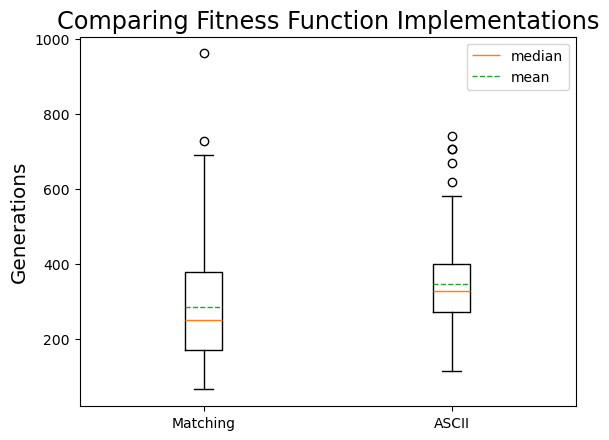

In [53]:
# Extra: Comparing different fitness functions implementations

target1 = "this is so much fun"
params = {"population_size": 100, "tournament_size": 10, "max_generation": 1000, "crossover_rate": 0.9, "mutate_rate": 0.05, "alphabet": ALPHABET}
iters = 100
basics = []
asciis = []
for _ in range(iters):
    _, n_basic = genetic_algorithm(target1, fitness_basic, params, log_frequency=0)
    basics.append(n_basic)
    _, n_asciss = genetic_algorithm(target1, fitness_forward, params, log_frequency=0)
    asciis.append(n_asciss)

print("Matching Fitness Generations: ", sum(basics) / len(basics))
print("ASCII Fitness Generations: ", sum(asciis) / len(asciis))
fig, ax = plt.subplots()
plt.title("Comparing Fitness Function Implementations", size="xx-large")
plt.ylabel("Generations", size="x-large")
gens = {"Matching": basics, "ASCII": asciis}
bx = ax.boxplot(gens.values(), showmeans=True, meanline=True)
ax.set_xticklabels(gens.keys())
plt.legend([bx["medians"][0], bx["means"][0]], ["median", "mean"])
plt.show()

That was unexpected, I assumed ascii difference would make a better fitness function, since it is a more fine-grained score. My guess is that ascii-difference doesn't help differentiate good and bad solutions under the genetic operations - mutation and recombination, since neither operation pushes genes towards the target gene. Rather, mutation and recombination happen randomly at random positions in the solution, resulting in random characters in that position, not one that is necessarily closer to the target.